# **Assignment - 1**

**Name -** Piyush Patil

**PRN -** 123B1B220

**PROBLEM STATEMENT:**

Select/download dataset from UCI/Kaggle or any other repository. Perform data
cleaning and exploratory data analysis (EDA) to gain insights from data
Data cleaning can be following but not limited to:
1. Handle missing values
2. Detect and treat outliers
3. Convert categorical data to numerical
4. Plot distributions
5. Analyze data using correlation
6. Feature selection

In [73]:
pip install ucimlrepo

# **1. Importing dataset**

## UCI Adult (Census Income) Dataset Overview

This dataset is extracted from the 1994 U.S. Census database and is commonly used for classification tasks. The goal is to predict whether an individual earns **more than $50K or less than or equal to $50K per year**, based on various demographic and employment-related attributes.

### Dataset Details:
- **Source**: UCI Machine Learning Repository  
- **Dataset ID**: 2  
- **Total Instances**: ~48,842  
- **Type**: Mixed (numerical + categorical)
- **Target Variable**: `income` (Binary: `<=50K`, `>50K`)

### Feature Attributes:
| Feature Name       | Description                                  |
|--------------------|----------------------------------------------|
| age                | Age of the individual                        |
| workclass          | Type of employment (e.g., Private, Self-emp) |
| fnlwgt             | Final weight (census-specific feature)       |
| education          | Highest level of education                   |
| education-num      | Number representing education level          |
| marital-status     | Marital status                               |
| occupation         | Job type                                     |
| relationship       | Relationship status within family            |
| race               | Race of the individual                       |
| sex                | Gender                                       |
| capital-gain       | Capital gain in the past year                |
| capital-loss       | Capital loss in the past year                |
| hours-per-week     | Working hours per week                       |
| native-country     | Country of origin                            |
| income             | Target: `<=50K` or `>50K`                    |

### Objective:
To perform **data preprocessing, feature scaling, and feature selection**, followed by **exploratory data visualization** and **distribution analysis**, in preparation for building linear regression models in future stages.

In [74]:
from ucimlrepo import fetch_ucirepo
# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
x = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

# **2. Creating a data frame with all features and target column**

In [75]:
df = x.copy()
df['income'] = y
df.head()

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

# **3. Data Cleaning**

In [76]:
# it prints info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [77]:
# it shows Mathematical analysis of dataset
df.describe()

age        fnlwgt  education-num  capital-gain  capital-loss  \
count  48842.000000  4.884200e+04   48842.000000  48842.000000  48842.000000   
mean      38.643585  1.896641e+05      10.078089   1079.067626     87.502314   
std       13.710510  1.056040e+05       2.570973   7452.019058    403.004552   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.175505e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.781445e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.376420e+05      12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    48842.000000  
mean        40.422382  
std         12.391444  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [78]:
# It prints number of rows and columns
df.shape

(48842, 15)

In [79]:
# it prints the type od data present in each column
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [80]:
# it prints the number of null values in each column
df.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [81]:
num_duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicate_rows}")

Number of duplicate rows: 29


In [82]:
df.drop_duplicates(inplace=True)

In [83]:
num_duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicate_rows}")

Number of duplicate rows: 0


In [84]:
df.shape

(48813, 15)

In [85]:
df.value_counts()

age  workclass         fnlwgt  education     education-num  marital-status      occupation       relationship    race   sex     capital-gain  capital-loss  hours-per-week  native-country  income
90   Self-emp-not-inc  282095  Some-college  10             Married-civ-spouse  Farming-fishing  Husband         White  Male    0             0             40              United-States   <=50K     1
17   ?                 34019   10th          6              Never-married       ?                Own-child       White  Male    0             0             20              United-States   <=50K     1
                       34088   12th          8              Never-married       ?                Own-child       White  Female  0             0             25              United-States   <=50K     1
                       41643   11th          7              Never-married       ?                Own-child       White  Female  0             0             15              United-States   <=50K     1
                       47407   11th          7              Never-married       ?                Own-child       White  Male    0             0             10              United-States   <=50K     1
                                                                                                                                                                                                     ..
                       103810  12th          8              Never-married       ?                Own-child       White  Male    0             0             40              United-States   <=50K     1
                       94366   10th          6              Never-married       ?                Other-relative  White  Male    0             0             6               United-States   <=50K     1
                       89870   10th          6              Never-married       ?                Own-child       White  Male    0             0             40              United-States   <=50K     1
                       86786   10th          6              Never-married       ?                Own-child       White  Female  0             0             40              United-States   <=50K     1
                       80077   11th          7              Never-married       ?                Own-child       White  Female  0             0             20              United-States   <=50K     1
Name: count, Length: 47592, dtype: int64

# **4. Label Encoding**

In [86]:
# LabelEncoder - it converts the categorical data to numerical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col  in df.columns:
  if df[col].dtype == 'object':
    df[col] = le.fit_transform(df[col])

df.tail()

age  workclass  fnlwgt  education  education-num  marital-status  \
48837   39          4  215419          9             13               0   
48838   64          9  321403         11              9               6   
48839   38          4  374983          9             13               2   
48840   44          4   83891          9             13               0   
48841   35          5  182148          9             13               2   

       occupation  relationship  race  sex  capital-gain  capital-loss  \
48837          10             1     4    0             0             0   
48838          15             2     2    1             0             0   
48839          10             0     4    1             0             0   
48840           1             3     1    1          5455             0   
48841           4             0     4    1             0             0   

       hours-per-week  native-country  income  
48837              36              39       1  
48838              40              39       1  
48839              50              39       1  
48840              40              39       1  
48841              60              39       3

# **5. Imputer**

In [87]:
# imputer - It handels the missing values such as nan
from sklearn.impute import SimpleImputer
import pandas as pd
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# **6. Scaling**

### **i) standard scaler**

In [88]:
# standerd scaler - scales the value between 0 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_ss = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df_ss.sample(5)


age  workclass    fnlwgt  education  education-num  \
20397 -1.141404  -0.031303  0.091549  -0.590612       0.358455   
24588 -0.266058   1.276929 -0.732889  -0.332505       1.136595   
24193 -1.433186  -0.031303  0.049591   1.216138      -0.030615   
1928  -1.360240  -0.031303 -0.234325   0.183709      -0.419685   
7606  -1.214349  -0.031303  0.347134   1.216138      -0.030615   

       marital-status  occupation  relationship      race       sex  \
20397        0.916303   -0.904271      1.595487  0.392418  0.704208   
24588       -0.410194   -0.670896     -0.900803  0.392418  0.704208   
24193        0.916303    0.262607      0.971414  0.392418 -1.420035   
1928         0.916303   -0.904271      0.971414  0.392418  0.704208   
7606         0.916303   -1.371023      0.971414  0.392418 -1.420035   

       capital-gain  capital-loss  hours-per-week  native-country    income  
20397     -0.144847     -0.217195        0.772745        0.276689 -0.834859  
24588     -0.144847     -0.217195        0.772745        0.276689  1.220934  
24193     -0.144847     -0.217195       -0.841352        0.276689 -0.834859  
1928      -0.144847     -0.217195       -0.034304        0.276689 -0.834859  
7606      -0.144847     -0.217195       -0.034304        0.276689 -0.834859

### **ii) min-max scaler**

In [89]:
# min max scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df.sample(5)

age  workclass    fnlwgt  education  education-num  \
10223  0.136986   0.444444  0.162518   1.000000       0.600000   
39829  0.232877   0.444444  0.222161   1.000000       0.600000   
29016  0.095890   0.444444  0.200255   0.733333       0.533333   
46347  0.191781   0.444444  0.200854   0.733333       0.533333   
41761  0.082192   0.444444  0.058942   1.000000       0.600000   

       marital-status  occupation  relationship  race  sex  capital-gain  \
10223        0.000000    0.266667           0.6   1.0  0.0           0.0   
39829        0.333333    0.466667           0.0   0.5  1.0           0.0   
29016        0.666667    0.200000           0.6   1.0  1.0           0.0   
46347        0.666667    0.400000           0.2   1.0  1.0           0.0   
41761        0.000000    0.066667           0.6   1.0  0.0           0.0   

       capital-loss  hours-per-week  native-country    income  
10223      0.000000        0.397959        0.928571  0.000000  
39829      0.472222        0.346939        0.928571  0.333333  
29016      0.000000        0.397959        0.928571  0.000000  
46347      0.000000        0.397959        0.928571  0.333333  
41761      0.000000        0.397959        0.928571  0.333333

### **iii) Decimal scaling**

In [90]:
# decimal scaling normalization
df_ds = df.copy()
for col in df_ds.columns:
    if df_ds[col].abs().max() > 0:
        power = 0
        while (df_ds[col] / (10**power)).abs().max() >= 1:
            power += 1
        df_ds[col] = df_ds[col] / (10**power)

df_ds.sample(5)

age  workclass    fnlwgt  education  education-num  \
28055  0.039726   0.022222  0.011037   0.080000       0.086667   
35543  0.023288   0.044444  0.009966   0.073333       0.053333   
40881  0.026027   0.044444  0.002538   0.073333       0.053333   
27992  0.061644   0.000000  0.011418   0.000000       0.033333   
43658  0.049315   0.044444  0.004409   0.100000       0.060000   

       marital-status  occupation  relationship  race  sex  capital-gain  \
28055        0.033333    0.066667          0.00   0.1  0.1           0.0   
35543        0.033333    0.046667          0.00   0.1  0.1           0.0   
40881        0.033333    0.020000          0.00   0.1  0.1           0.0   
27992        0.100000    0.000000          0.02   0.1  0.0           0.0   
43658        0.083333    0.066667          0.02   0.1  0.1           0.0   

       capital-loss  hours-per-week  native-country    income  
28055      0.000000        0.397959        0.092857  0.066667  
35543      0.047084        0.397959        0.092857  0.033333  
40881      0.000000        0.448980        0.092857  0.033333  
27992      0.000000        0.295918        0.092857  0.000000  
43658      0.000000        0.602041        0.092857  0.033333

## **iv) Feature Scaling Comparison (age vs hours-per-week)**  
This section visualizes how RobustScaler, StandardScaler, and MinMaxScaler affect the distribution of `age` and `hours-per-week` features.


In [91]:
from sklearn import preprocessing

# Selecting numerical columns for scaling comparison
x = df[['age', 'hours-per-week']]
print("Original feature sample:")
print(x.head())

# Robust Scaling
scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(x)
robust_df = pd.DataFrame(robust_df, columns=['age', 'hours-per-week'])

# Standard Scaling
scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_df, columns=['age', 'hours-per-week'])

# MinMax Scaling
scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(x)
minmax_df = pd.DataFrame(minmax_df, columns=['age', 'hours-per-week'])


Original feature sample:
        age  hours-per-week
0  0.301370        0.397959
1  0.452055        0.122449
2  0.287671        0.397959
3  0.493151        0.397959
4  0.150685        0.397959


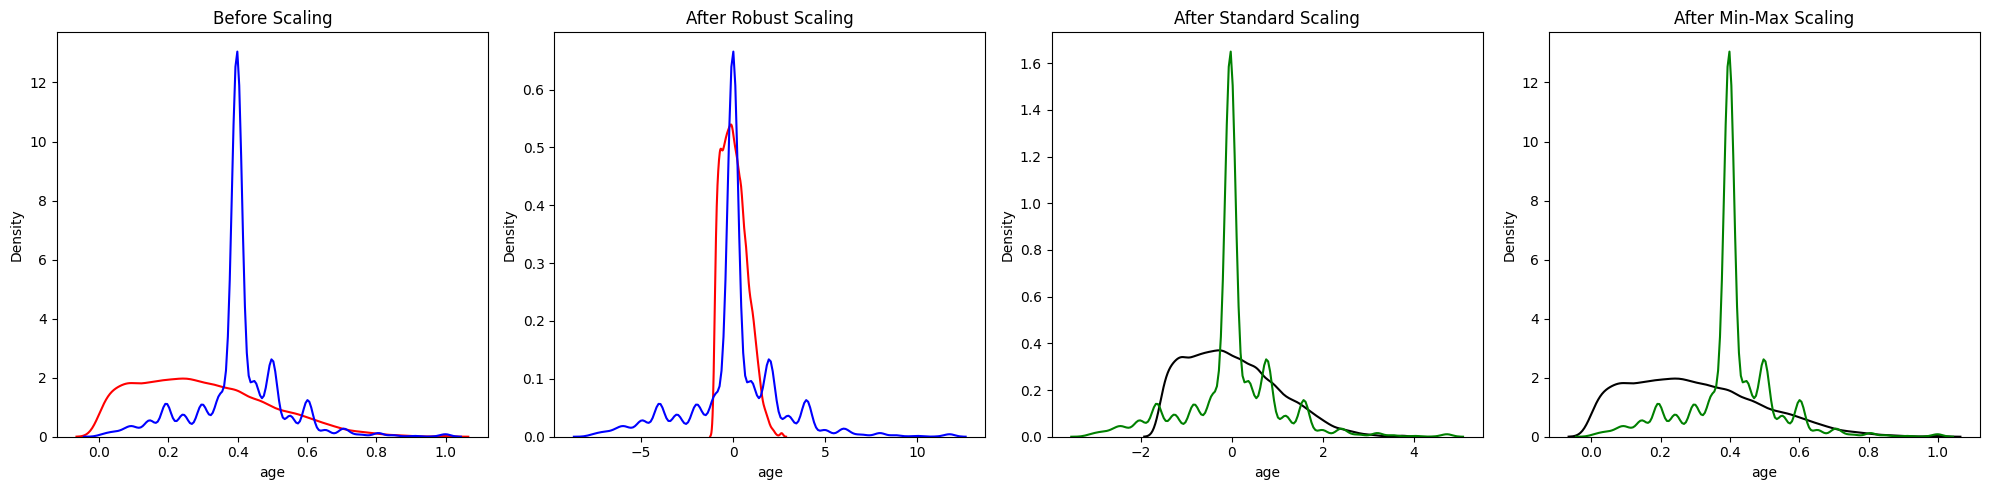

In [92]:
# KDE Plot comparison of different scalers
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(x['age'], ax=ax1, color='r', label='age')
sns.kdeplot(x['hours-per-week'], ax=ax1, color='b', label='hours-per-week')

ax2.set_title('After Robust Scaling')
sns.kdeplot(robust_df['age'], ax=ax2, color='red')
sns.kdeplot(robust_df['hours-per-week'], ax=ax2, color='blue')

ax3.set_title('After Standard Scaling')
sns.kdeplot(standard_df['age'], ax=ax3, color='black')
sns.kdeplot(standard_df['hours-per-week'], ax=ax3, color='green')

ax4.set_title('After Min-Max Scaling')
sns.kdeplot(minmax_df['age'], ax=ax4, color='black')
sns.kdeplot(minmax_df['hours-per-week'], ax=ax4, color='green')

plt.tight_layout()
plt.show()

# 7. Feature Selection

### **Creating multiple dataframes for each method**

In [93]:

df_vt = df.copy() #variance threshold
df_kc = df.copy() # k-best chi2
df_ka = df.copy() # k-best anova(f_regression)
df_pc = df.copy() # select percentile chi2
df_pa = df.copy() # select percentile anova(f_regression)

### **i) variance threshold method**

[0.03526608 0.02885393 0.00510451 0.06671414 0.02936037 0.06314588
 0.08160305 0.10270463 0.04473652 0.22161114 0.00555649 0.00856409
 0.01598632 0.03001459]


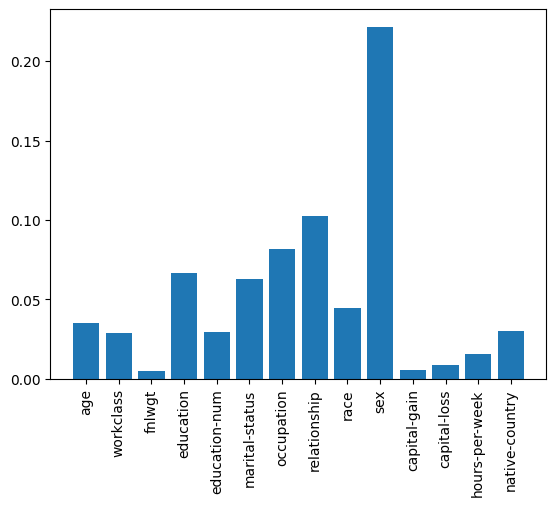

In [94]:
# variance threshold method for feature selection
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder

selector_vt=VarianceThreshold(threshold=0)
selector_vt.fit(df_vt.drop('income', axis=1))

print(selector_vt.variances_)

# graph of each column with the variance value
import matplotlib.pyplot as plt
plt.bar(df_vt.drop('income', axis=1).columns, selector_vt.variances_)
plt.xticks(rotation=90)
plt.show()

### **ii) selectk-best features using chi2**

[8.52199400e+01 2.40320053e+00 9.80480684e-04 8.19224012e+00
 6.95392345e+01 7.32770588e+01 1.48174846e+01 3.21102796e+02
 3.37535593e+00 1.98108405e+02 3.56440811e+02 1.16072110e+02
 2.68718419e+01 1.31194721e+00 8.20125485e+03]
[2.66956163e-20 1.21087291e-01 9.75020220e-01 4.20699442e-03
 7.49095070e-17 1.12669907e-17 1.18432364e-04 8.33085601e-72
 6.61782837e-02 5.40293701e-45 1.67724947e-79 4.58324811e-27
 2.17403379e-07 2.52042406e-01 0.00000000e+00]


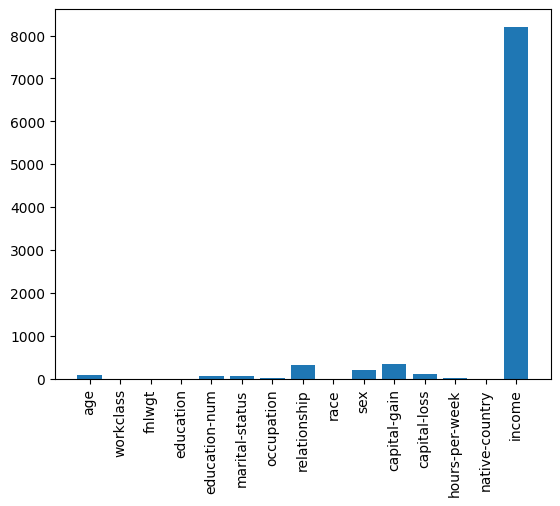

In [95]:
# selectk-best features using chi2
from sklearn.feature_selection import SelectKBest, chi2
import numpy as np
selector_kc = SelectKBest(chi2, k=10)
selector_kc.fit_transform(df_kc, df['income'].astype(int))

print(selector_kc.scores_)

print(selector_kc.pvalues_)

# graph of each column with the scores and  pvalues
import matplotlib.pyplot as plt
plt.bar(df_kc.columns, selector_kc.scores_)
plt.xticks(rotation=90)
plt.show()

### **iii) selectk-best features using f_regression**

[2.14439217e+03 3.61841083e+02 1.95347550e+00 2.30892928e+02
 4.51774020e+03 1.47697366e+03 4.12152793e+02 2.56612102e+03
 2.00785644e+02 1.77275159e+03 1.94484157e+03 8.35551064e+02
 2.00959526e+03 7.18014634e+01 1.37133625e+17]
[0.00000000e+000 2.18826949e-080 1.62219176e-001 5.01009354e-052
 0.00000000e+000 2.28723244e-318 2.97224773e-091 0.00000000e+000
 1.73263743e-045 0.00000000e+000 0.00000000e+000 3.48293544e-182
 0.00000000e+000 2.44515382e-017 0.00000000e+000]


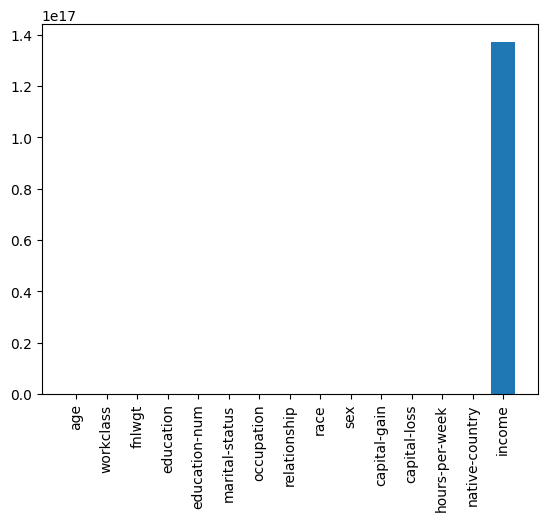

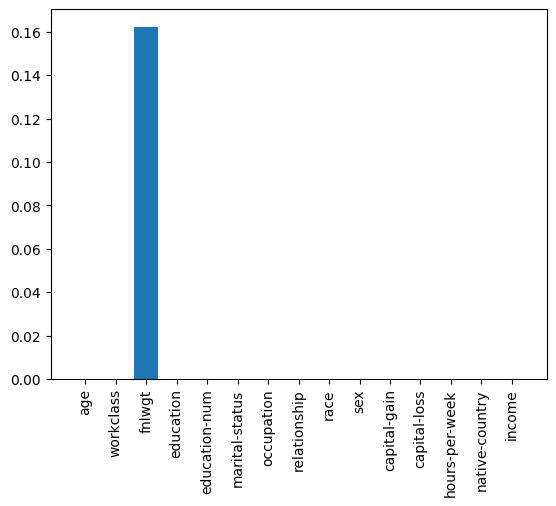

In [96]:
# selectk-best features using f_regression
from sklearn.feature_selection import SelectKBest, f_regression
selector_ka = SelectKBest(f_regression, k=10)
selector_ka.fit_transform(df_ka, df['income'])

print(selector_ka.scores_)

print(selector_ka.pvalues_)

# graph of each column with the scores and  pvalues
import matplotlib.pyplot as plt
plt.bar(df_ka.columns, selector_ka.scores_)
plt.xticks(rotation=90)
plt.show()

import matplotlib.pyplot as plt
plt.bar(df_ka.columns, selector_ka.pvalues_)
plt.xticks(rotation=90)
plt.show()

### **iv) selectPercentile features using chi2**

[8.52199400e+01 2.40320053e+00 9.80480684e-04 8.19224012e+00
 6.95392345e+01 7.32770588e+01 1.48174846e+01 3.21102796e+02
 3.37535593e+00 1.98108405e+02 3.56440811e+02 1.16072110e+02
 2.68718419e+01 1.31194721e+00 8.20125485e+03]
[2.66956163e-20 1.21087291e-01 9.75020220e-01 4.20699442e-03
 7.49095070e-17 1.12669907e-17 1.18432364e-04 8.33085601e-72
 6.61782837e-02 5.40293701e-45 1.67724947e-79 4.58324811e-27
 2.17403379e-07 2.52042406e-01 0.00000000e+00]


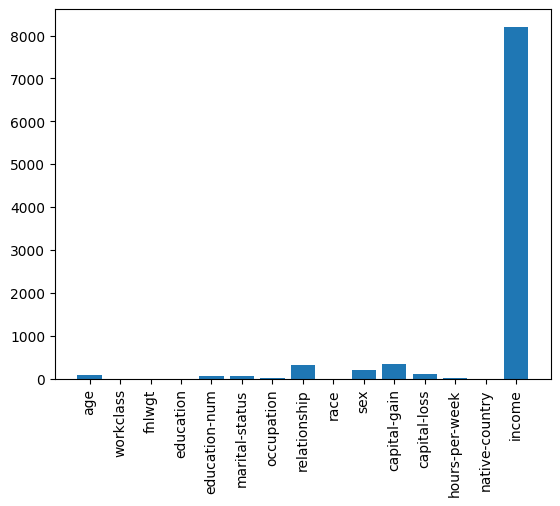

In [97]:
# selectPercentile features using chi2
from sklearn.feature_selection import SelectPercentile, chi2
selector_sc = SelectPercentile(chi2, percentile=50)
selector_sc.fit_transform(df_pc, df['income'].astype(int))

print(selector_sc.scores_)

print(selector_sc.pvalues_)

# graph of each column with the scores and  pvalues
import matplotlib.pyplot as plt
plt.bar(df_pc.columns, selector_sc.scores_)
plt.xticks(rotation=90)
plt.show()

### **v) selectPercentile features using f_regression**

[2.14439217e+03 3.61841083e+02 1.95347550e+00 2.30892928e+02
 4.51774020e+03 1.47697366e+03 4.12152793e+02 2.56612102e+03
 2.00785644e+02 1.77275159e+03 1.94484157e+03 8.35551064e+02
 2.00959526e+03 7.18014634e+01 1.37133625e+17]
[0.00000000e+000 2.18826949e-080 1.62219176e-001 5.01009354e-052
 0.00000000e+000 2.28723244e-318 2.97224773e-091 0.00000000e+000
 1.73263743e-045 0.00000000e+000 0.00000000e+000 3.48293544e-182
 0.00000000e+000 2.44515382e-017 0.00000000e+000]


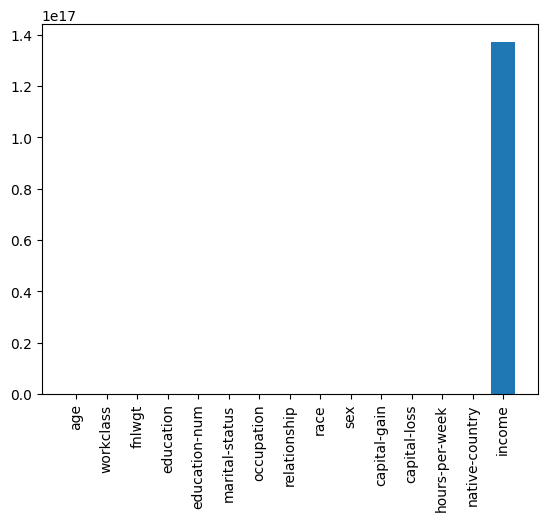

In [98]:
# selectPercentile features using f_regression
from sklearn.feature_selection import SelectPercentile, f_regression
selector_sa = SelectPercentile(f_regression, percentile=80)
selector_sa.fit_transform(df_pa, df['income'])

print(selector_sa.scores_)

print(selector_sa.pvalues_)

# graph of each column with the scores and  pvalues
import matplotlib.pyplot as plt
plt.bar(df_pa.columns, selector_sa.scores_)
plt.xticks(rotation=90)
plt.show()

# **Principal Components Analysis ( PCA)**

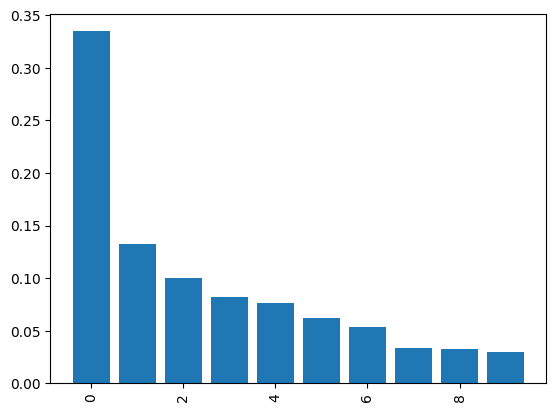

In [99]:
# Principal Components Analysis ( PCA)
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
df_pca = pca.fit_transform(df)
df_pca = pd.DataFrame(df_pca)
df_pca.head()

# graph of each column with the scores and  pvalues
import matplotlib.pyplot as plt
plt.bar(df_pca.columns, pca.explained_variance_ratio_)
plt.xticks(rotation=90)
plt.show()

# **8. Data Visualization**

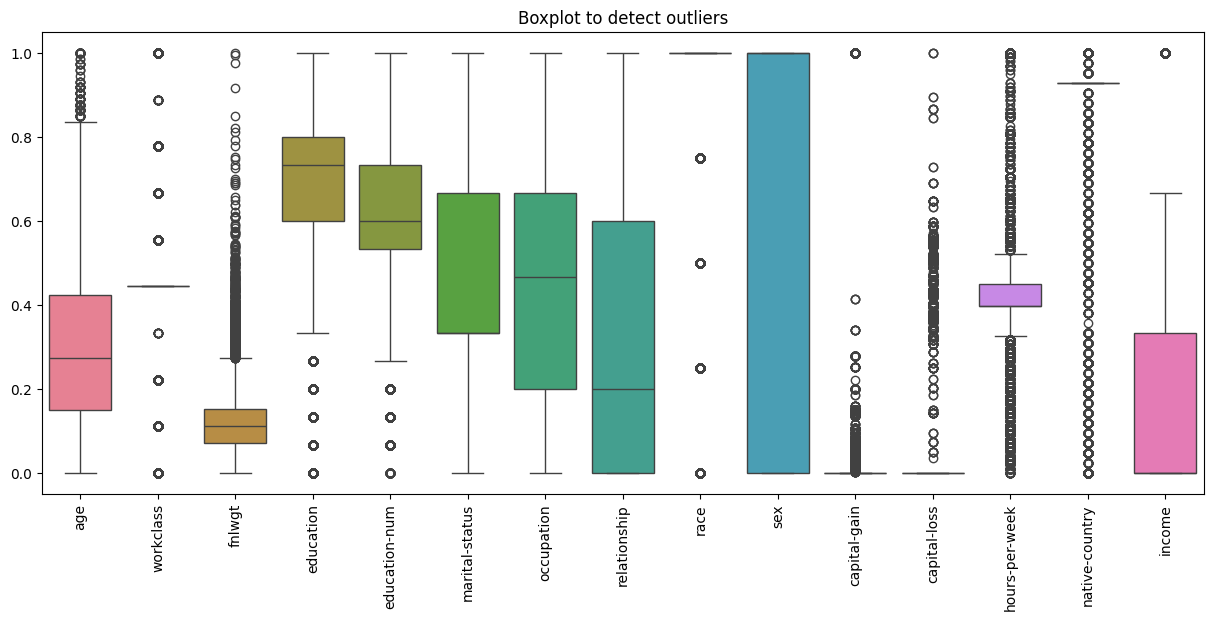

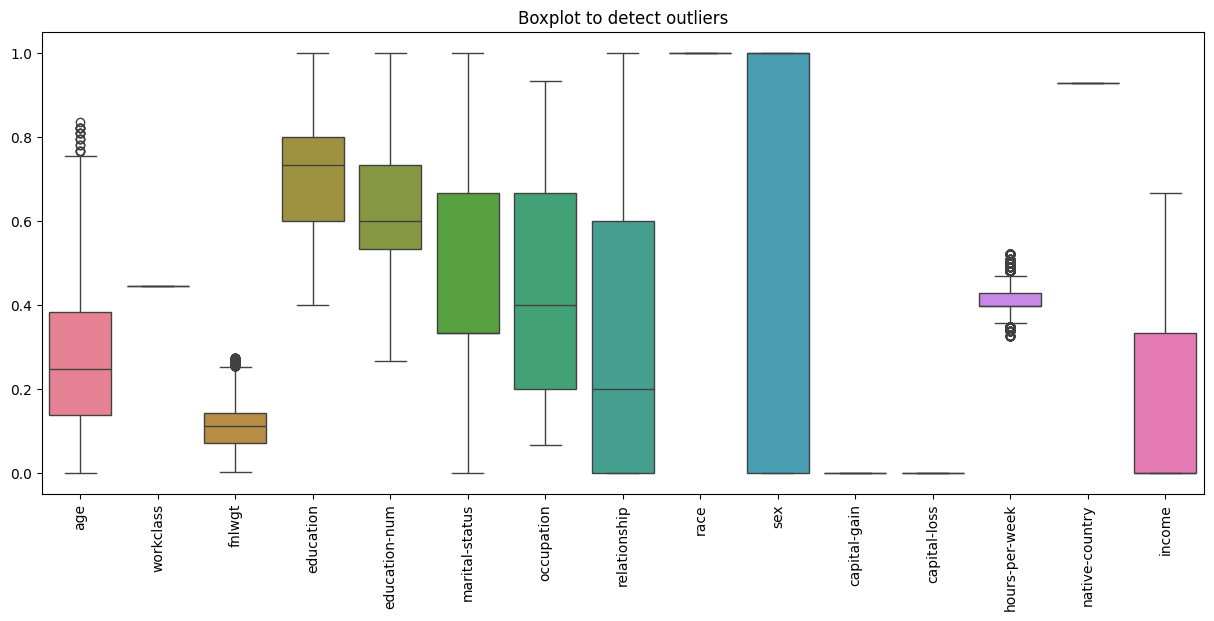

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for numerical features
plt.figure(figsize=(15, 6))
sns.boxplot(data=df.select_dtypes(include='number'))
plt.xticks(rotation=90)
plt.title("Boxplot to detect outliers")
plt.show()

# Optional: IQR method to remove outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


# Boxplot for numerical features
plt.figure(figsize=(15, 6))
sns.boxplot(data=df.select_dtypes(include='number'))
plt.xticks(rotation=90)
plt.title("Boxplot to detect outliers")
plt.show()


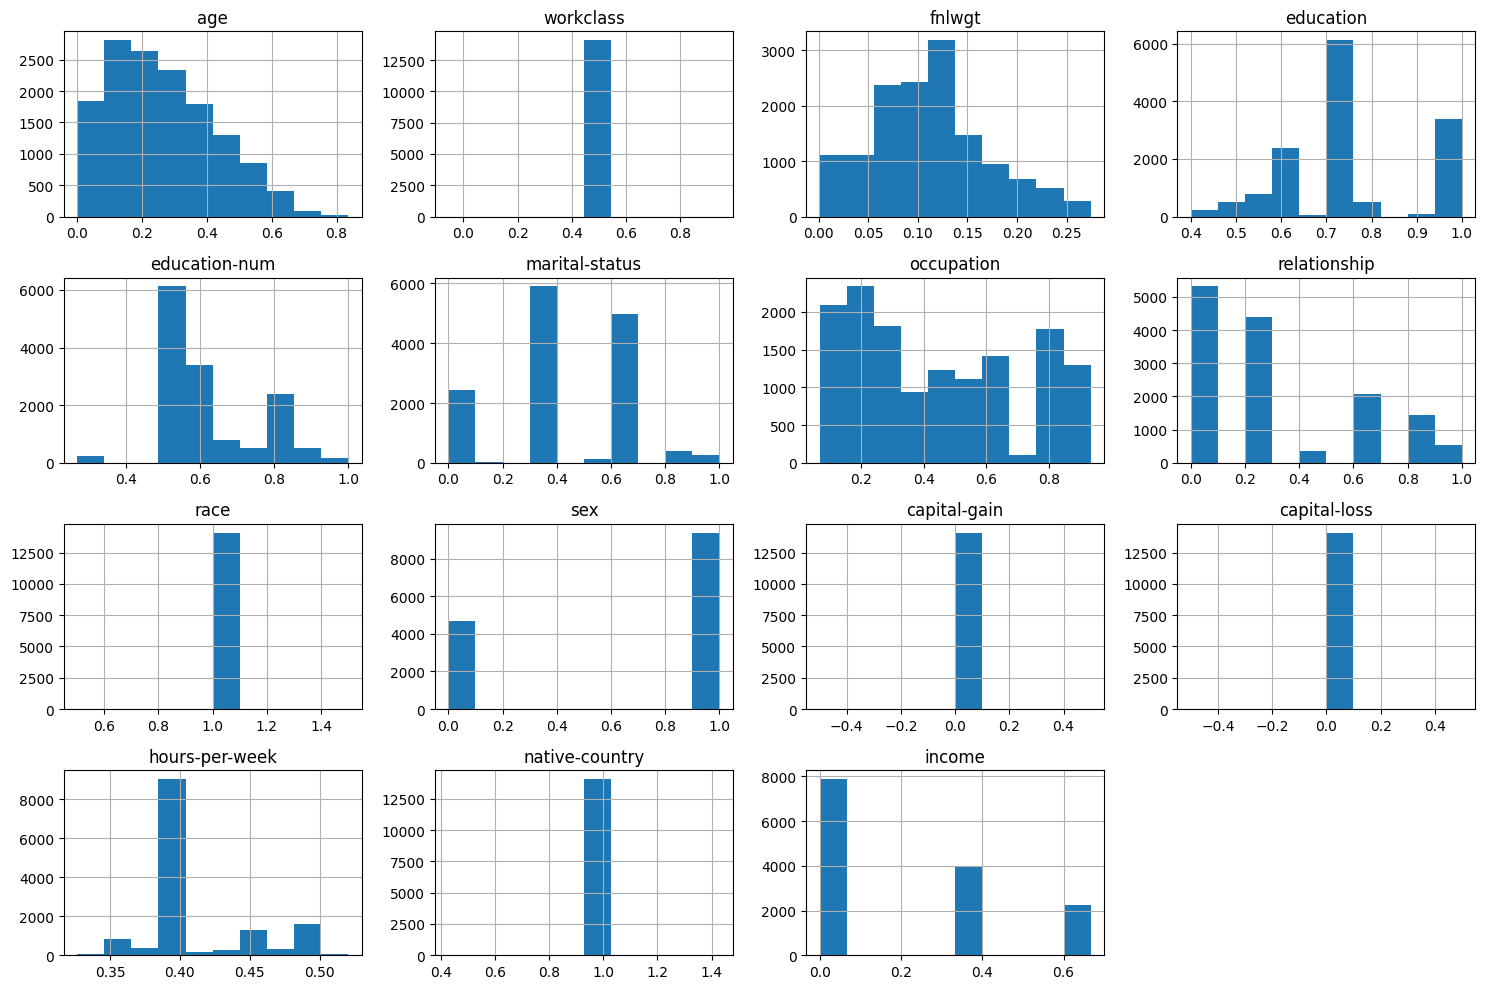

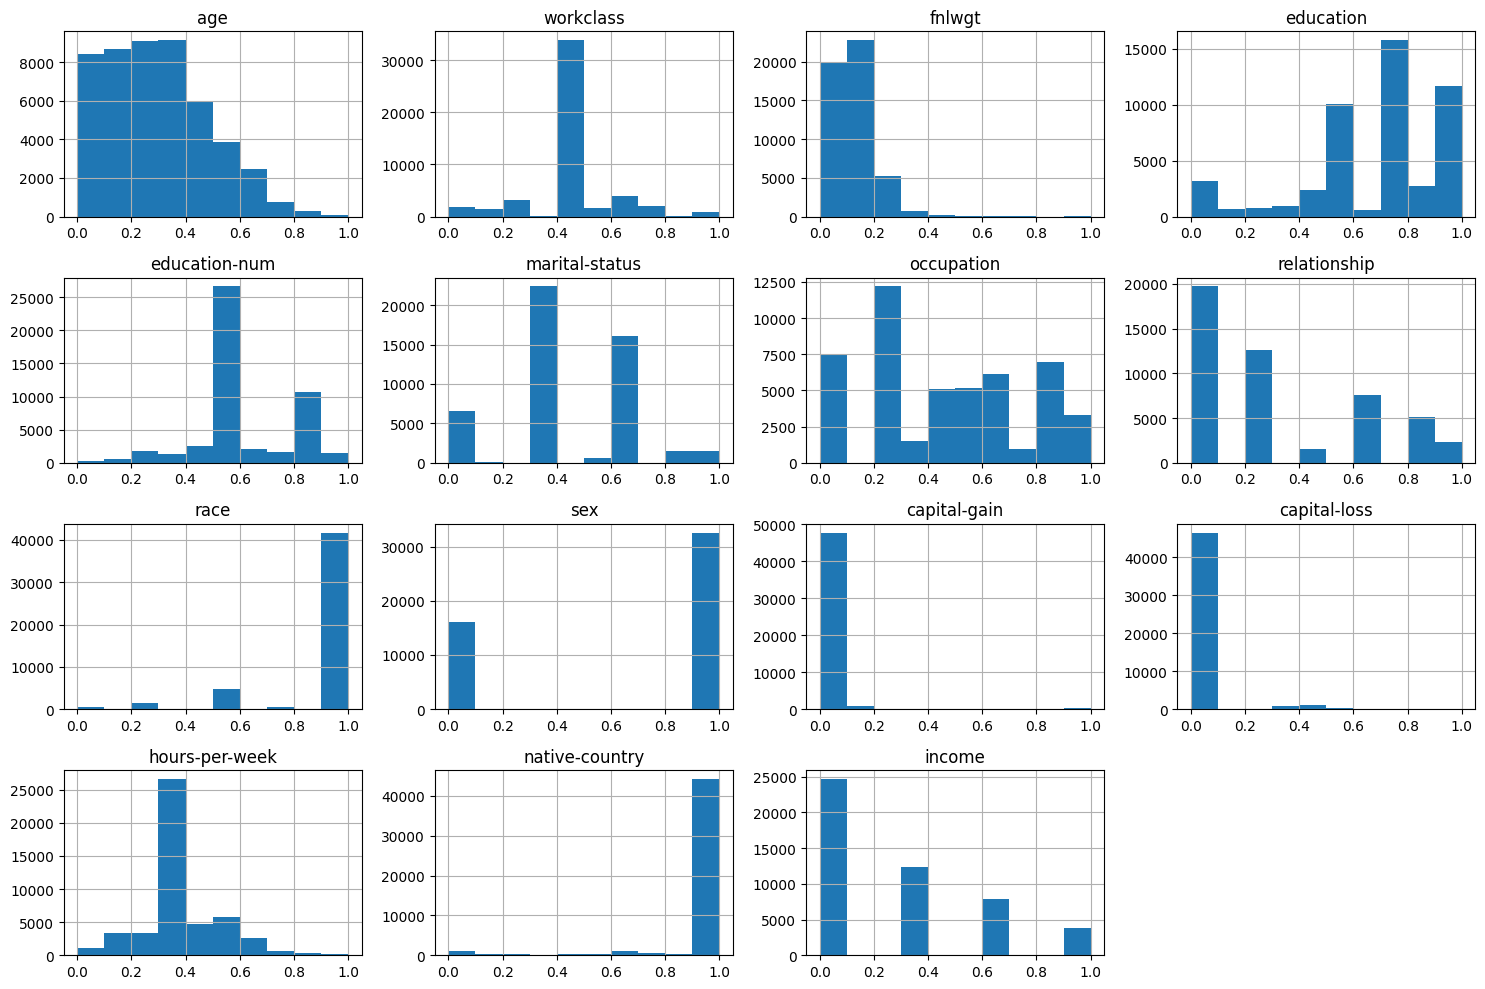

In [100]:
# Histograms for all numerical columns
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()


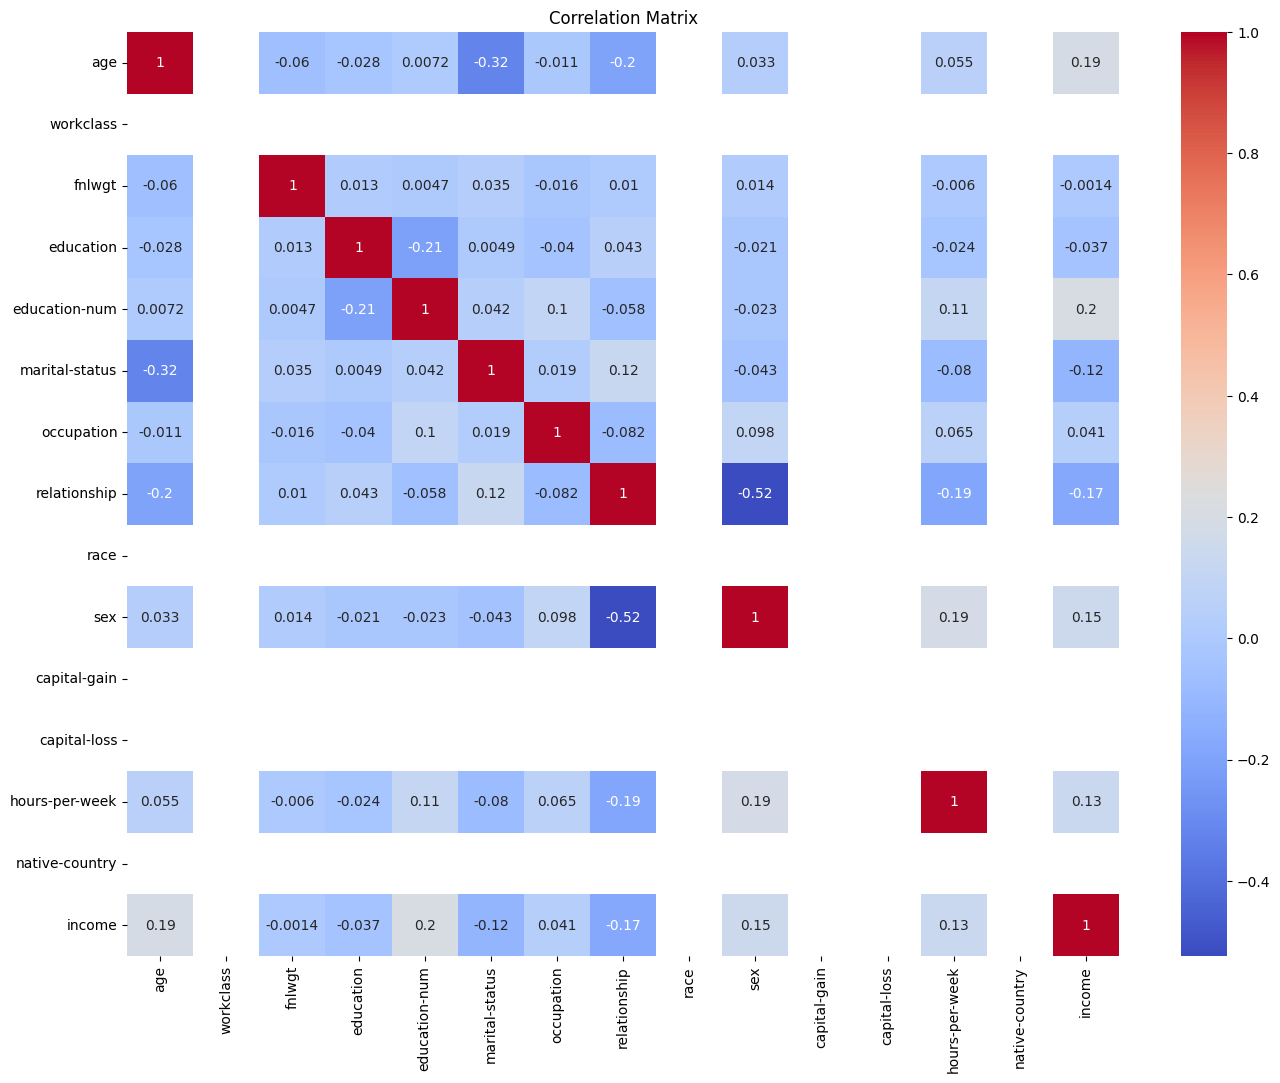

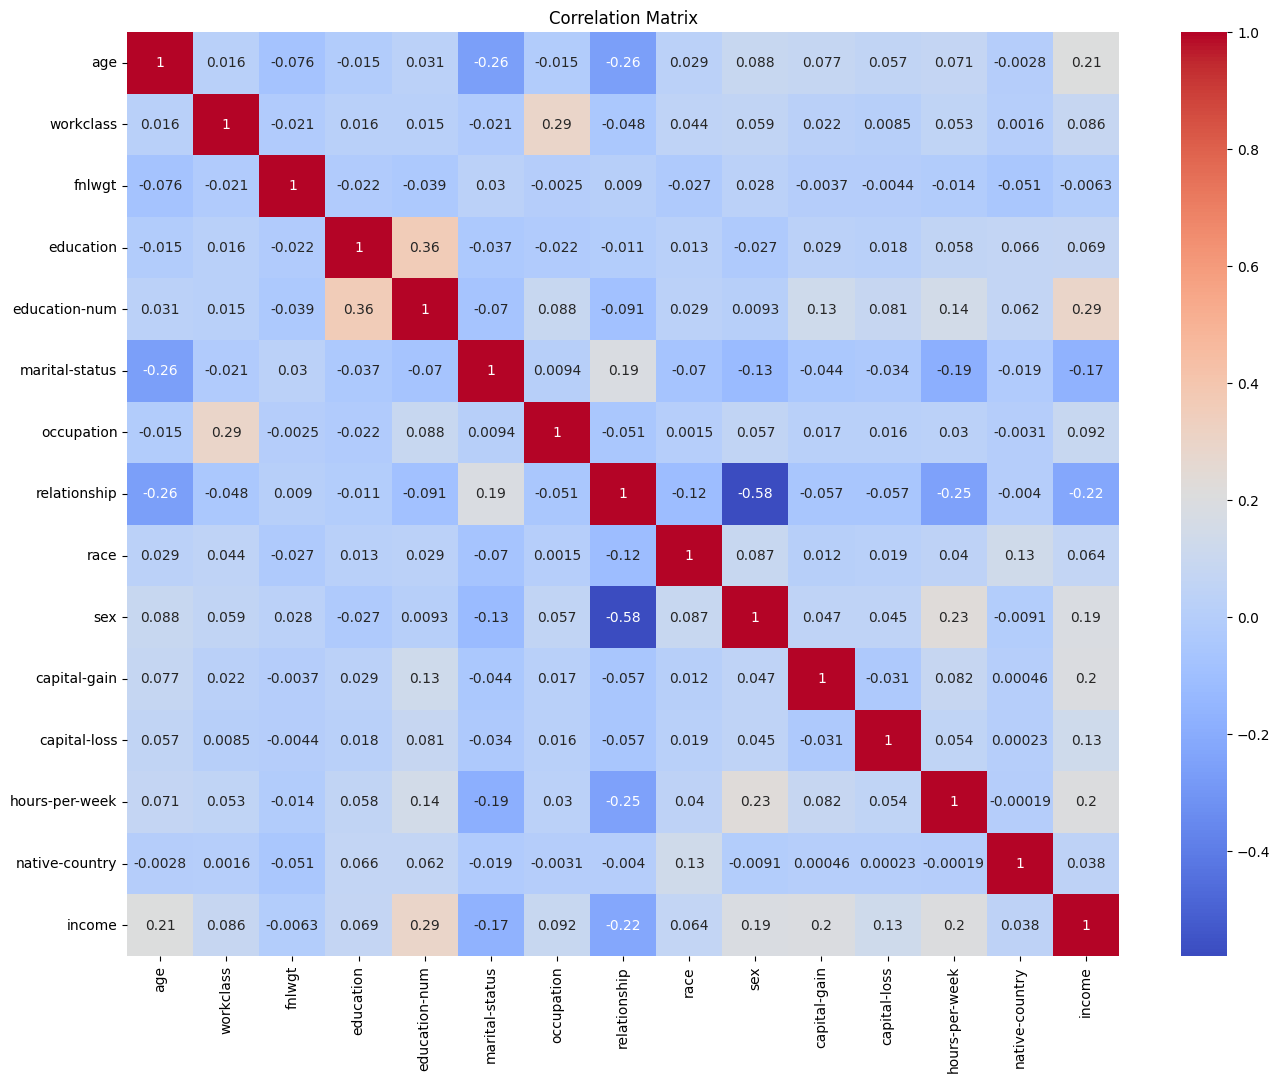

In [101]:
# correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


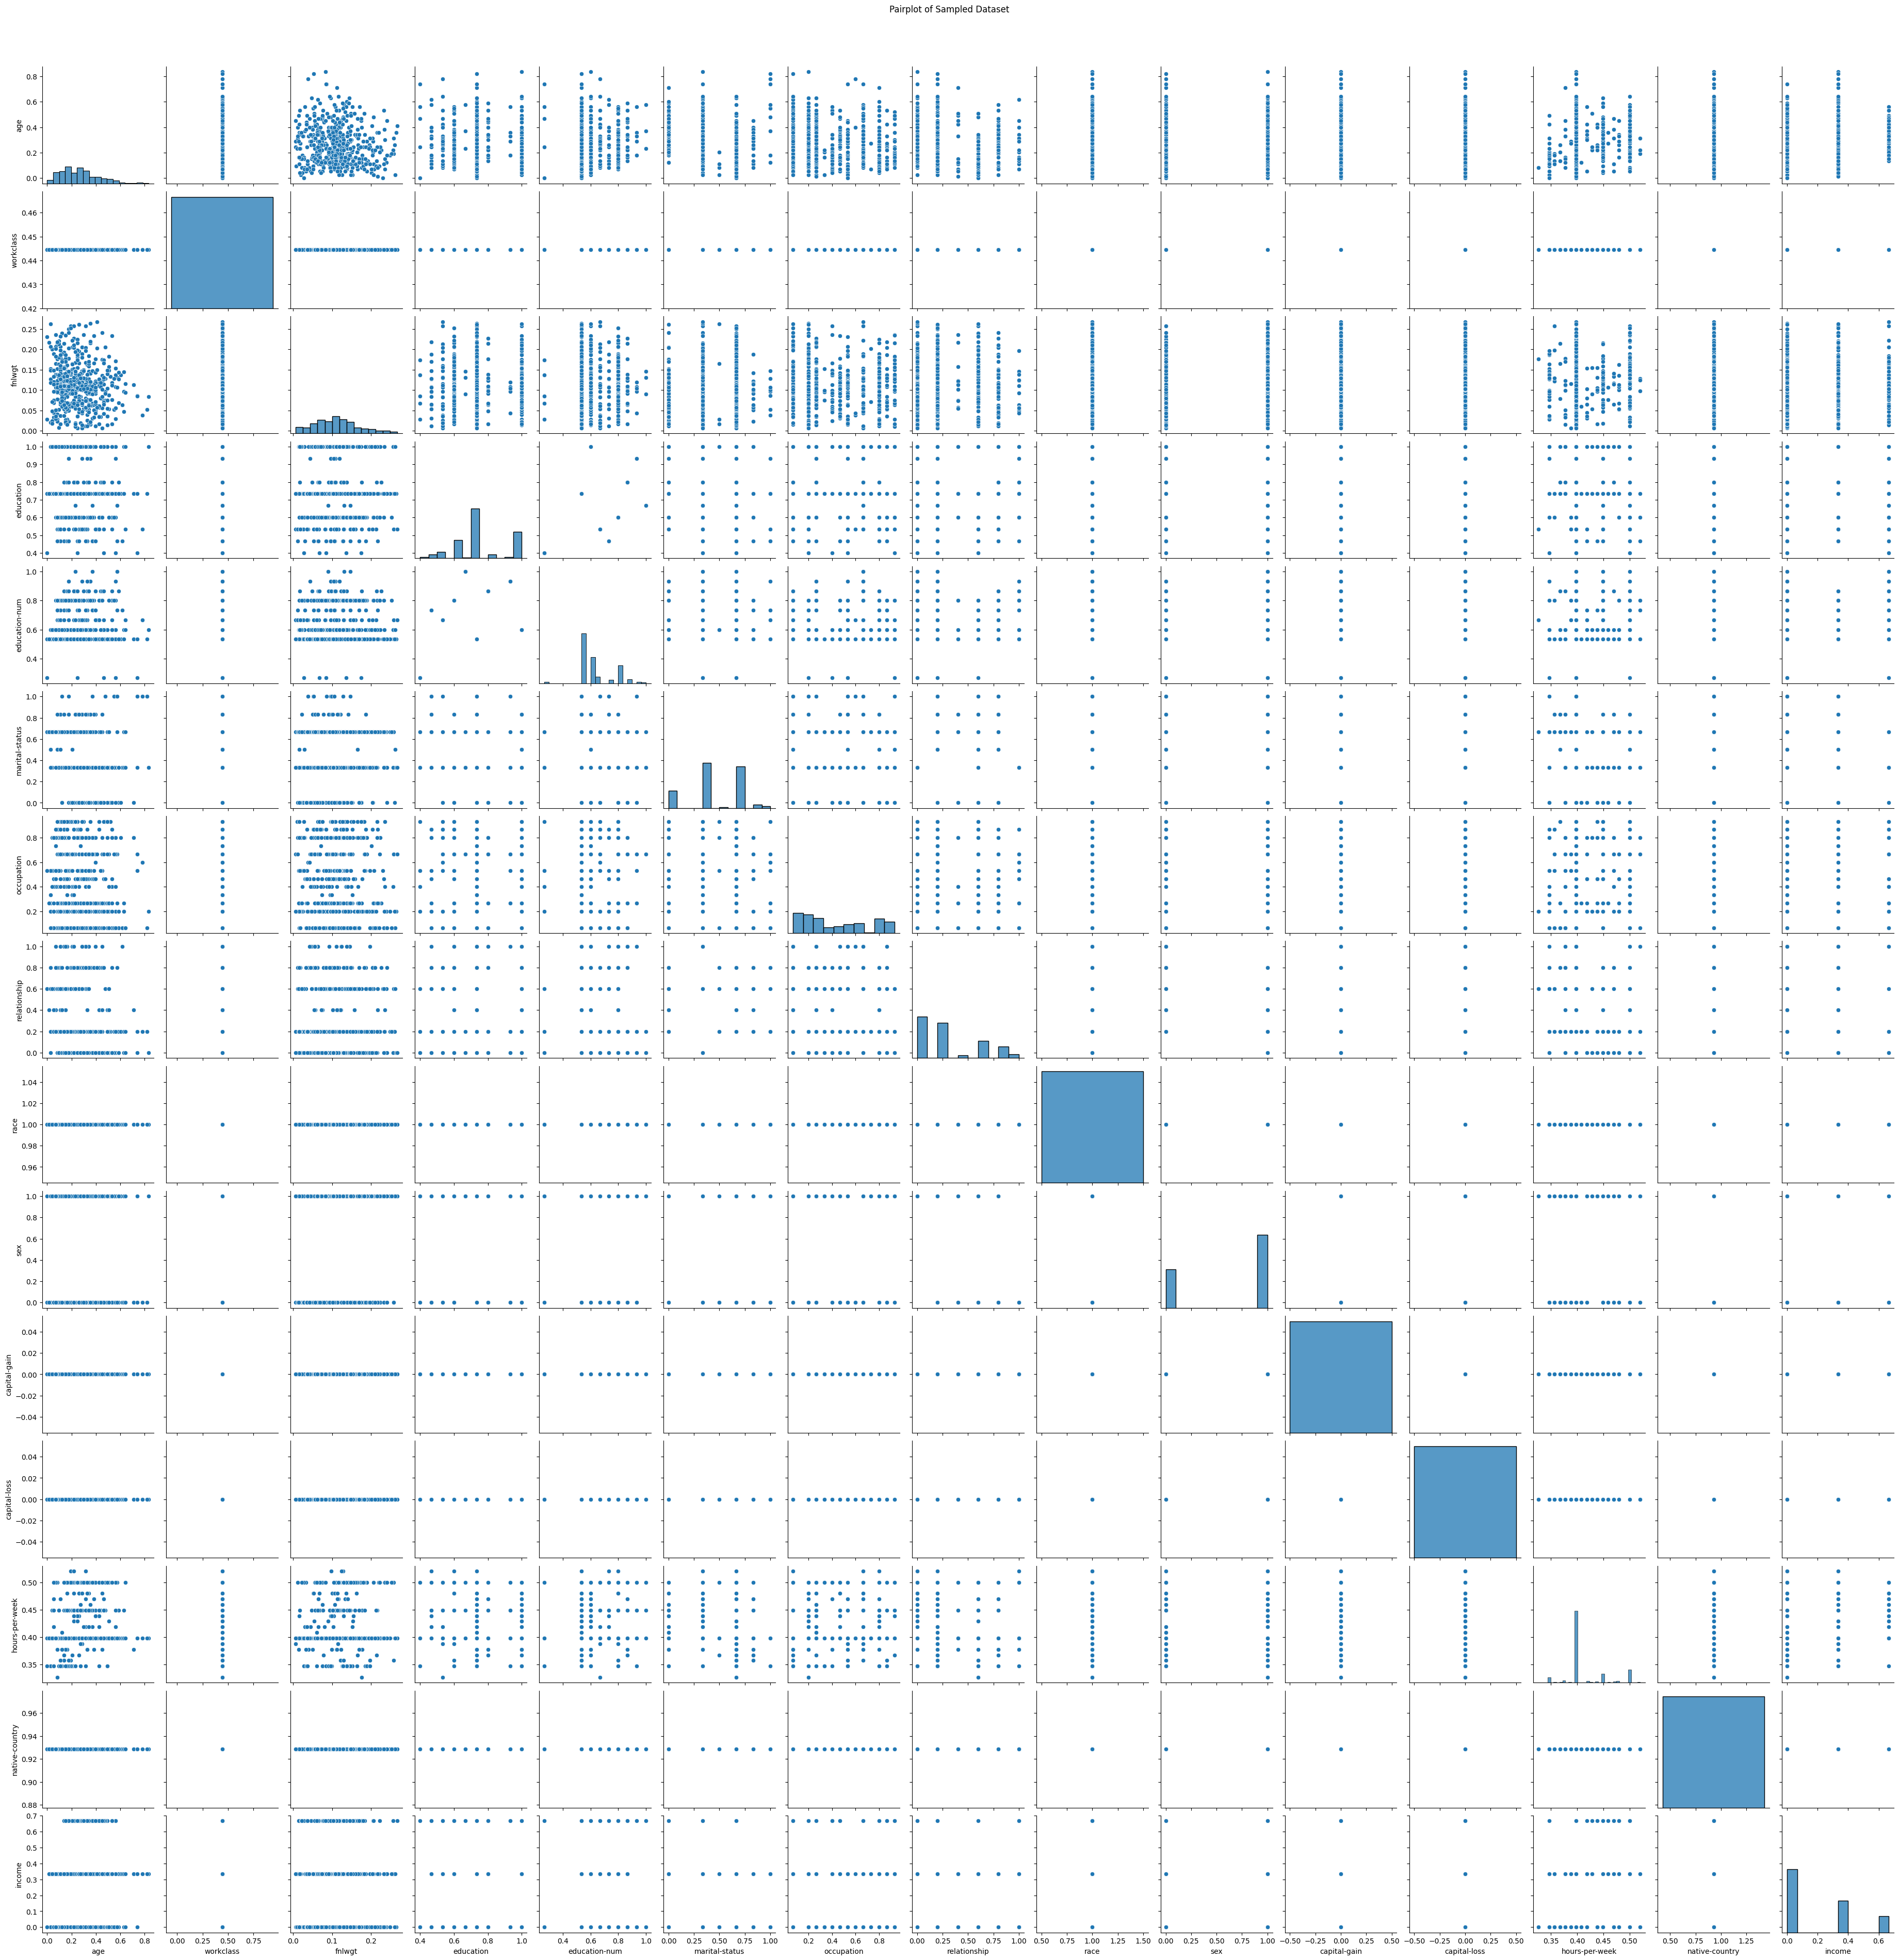

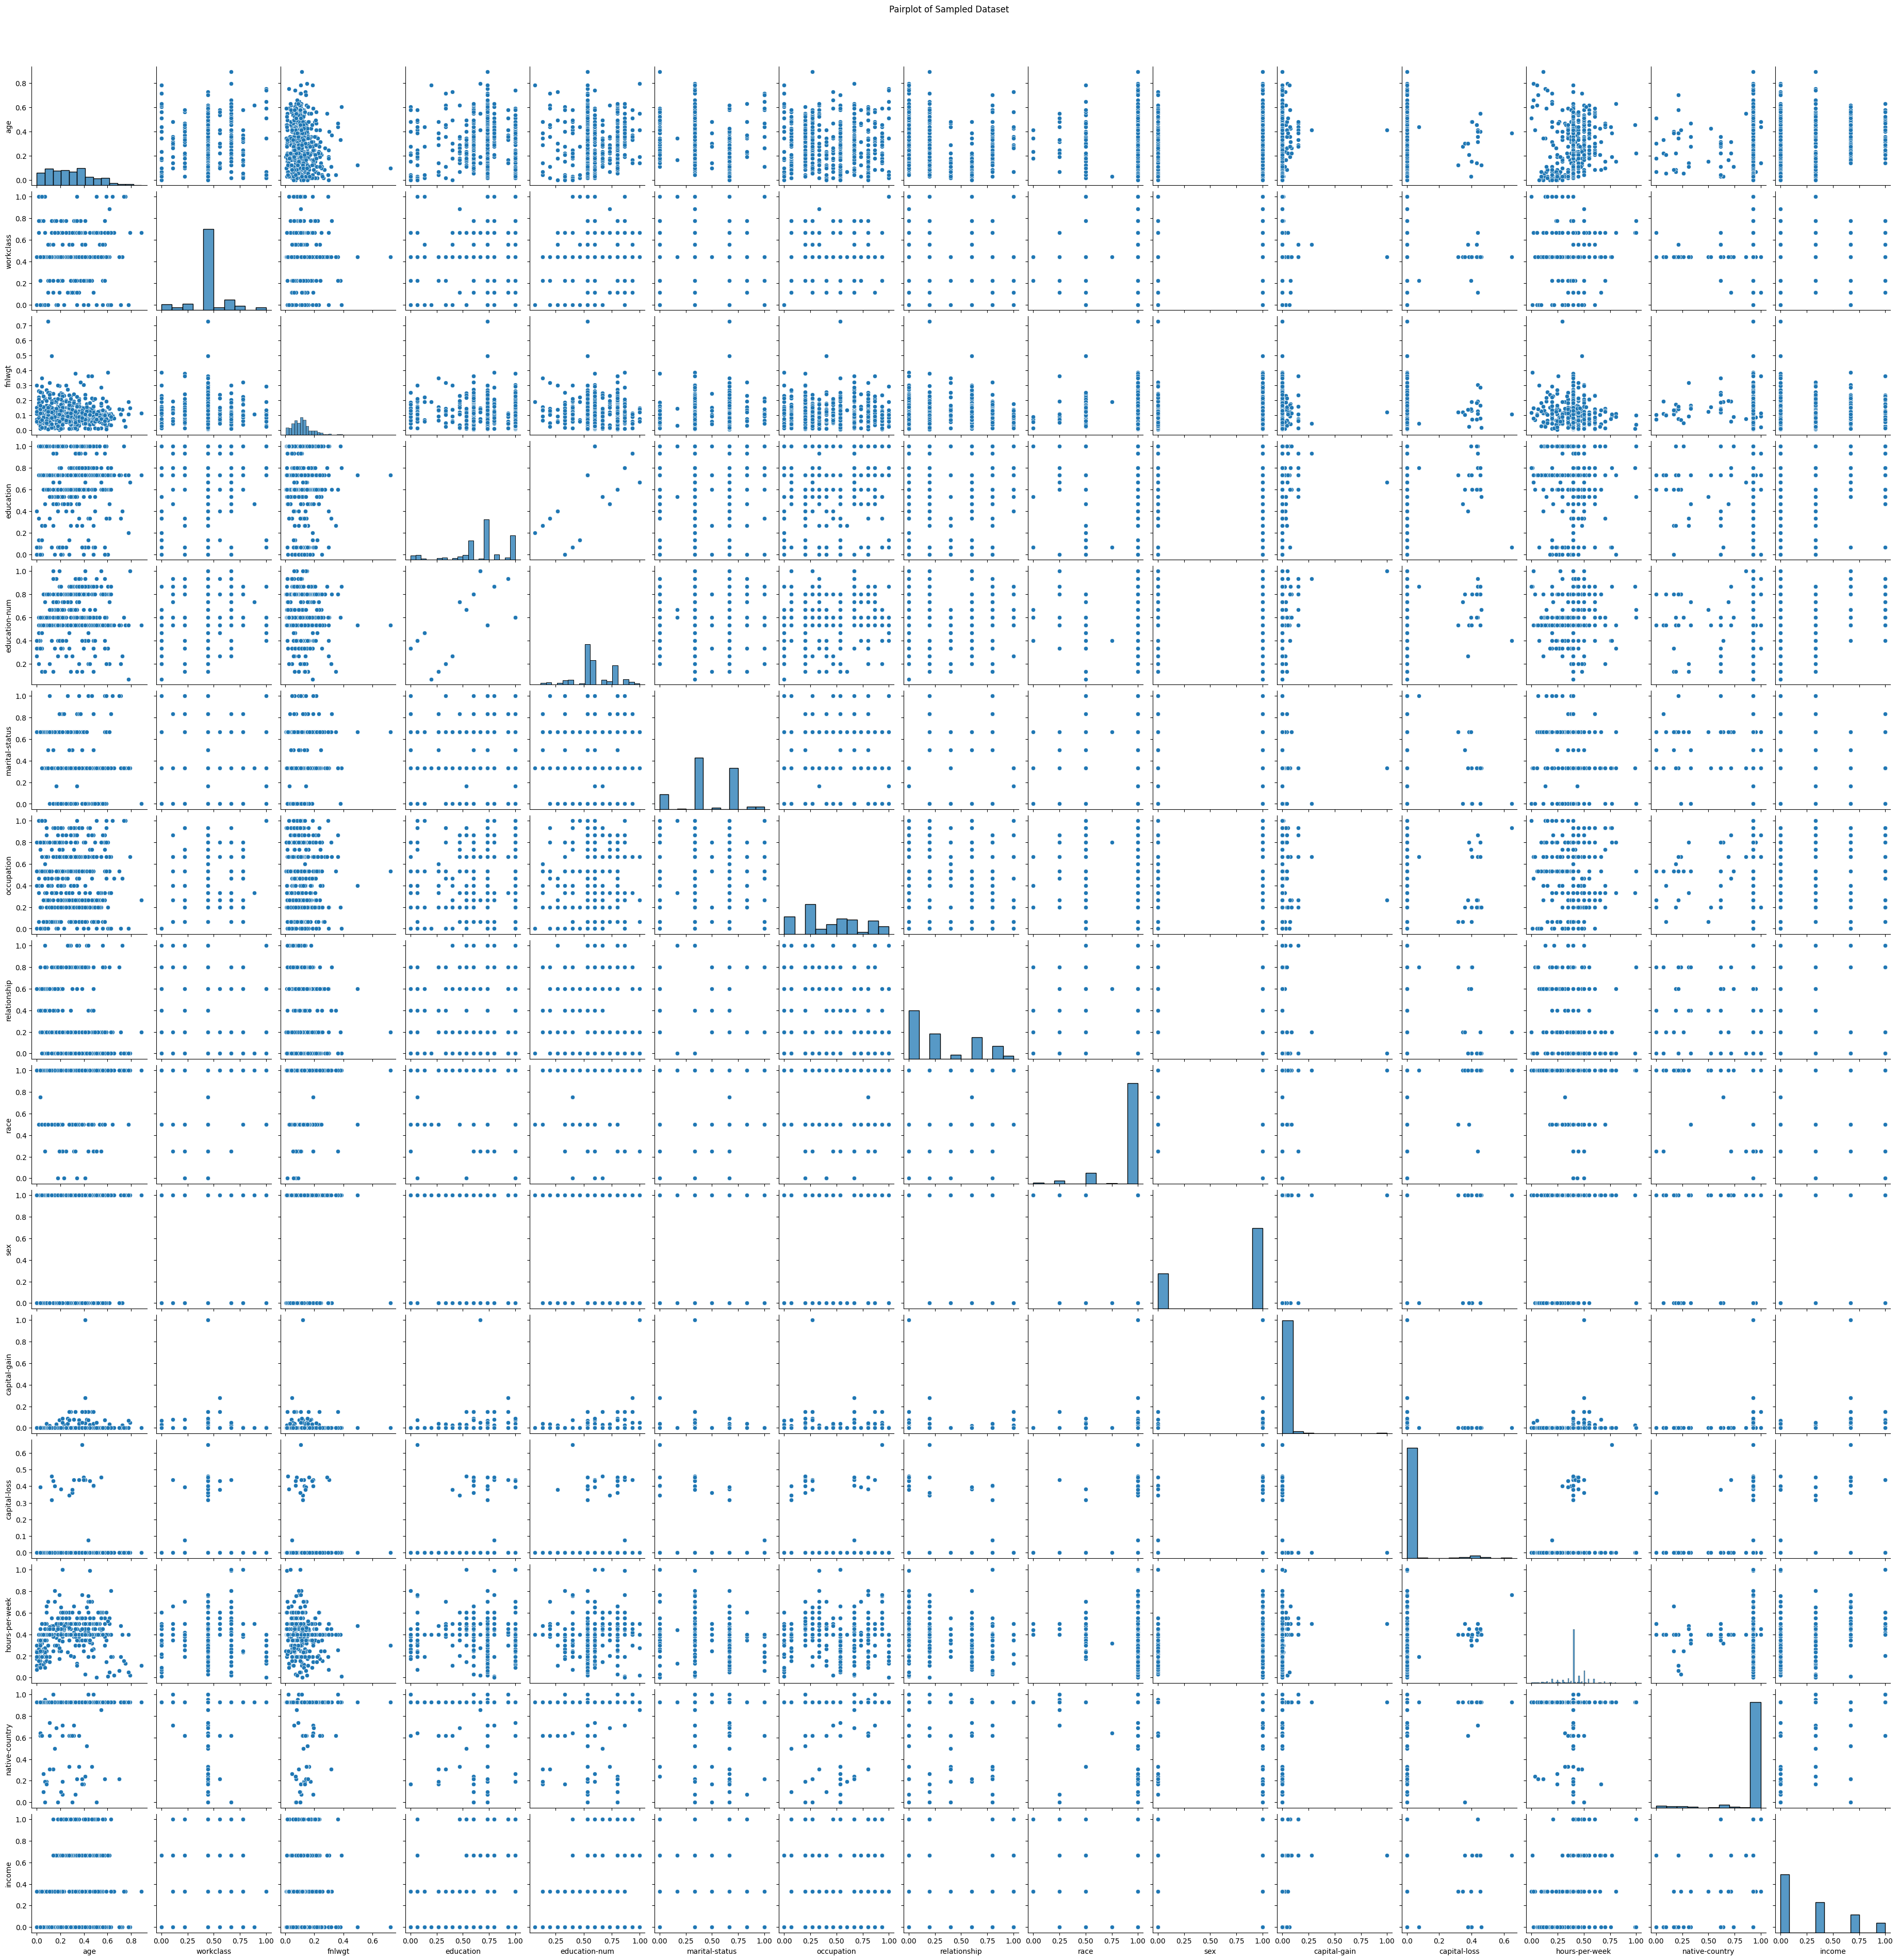

In [102]:
import seaborn as sns
sns.pairplot(df.sample(500))  # sample to reduce plot size
plt.suptitle('Pairplot of Sampled Dataset', y=1.02)
plt.show()


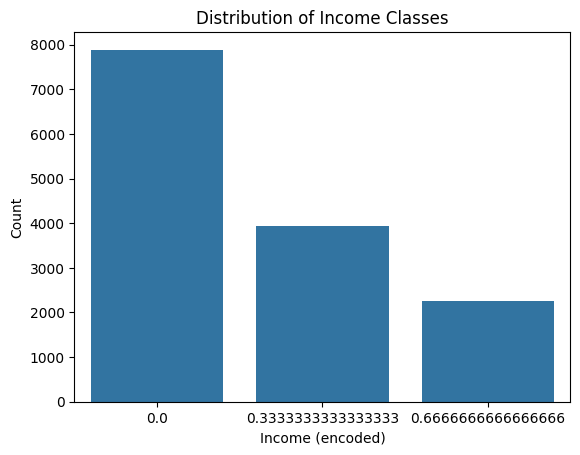

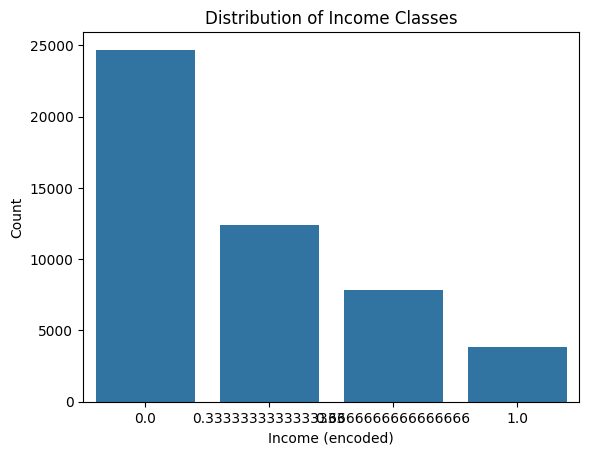

In [103]:
sns.countplot(x='income', data=df)
plt.title('Distribution of Income Classes')
plt.xlabel('Income (encoded)')
plt.ylabel('Count')
plt.show()


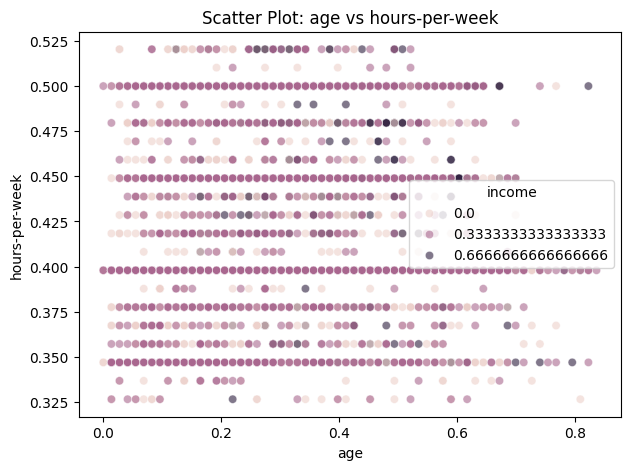

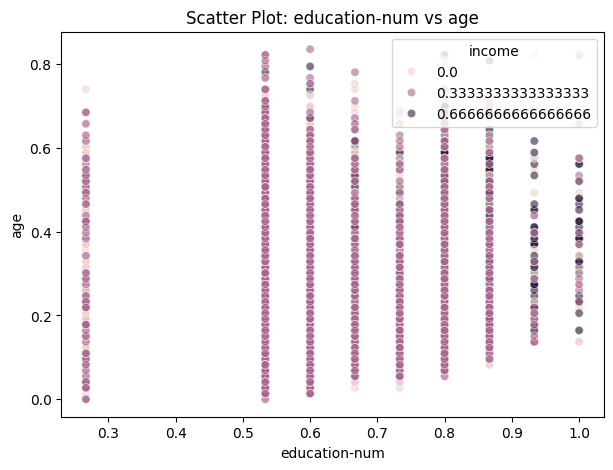

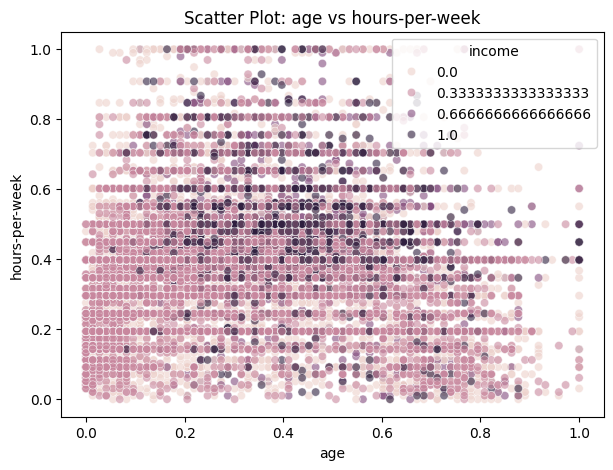

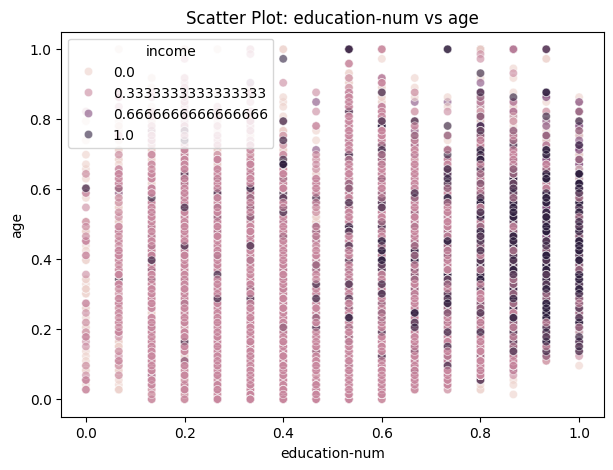

In [104]:
pairs = [('age', 'hours-per-week'), ('education-num', 'age')]

for x_col, y_col in pairs:
    plt.figure(figsize=(7, 5))
    sns.scatterplot(x=x_col, y=y_col, hue='income', data=df, alpha=0.6)
    plt.title(f'Scatter Plot: {x_col} vs {y_col}')
    plt.show()


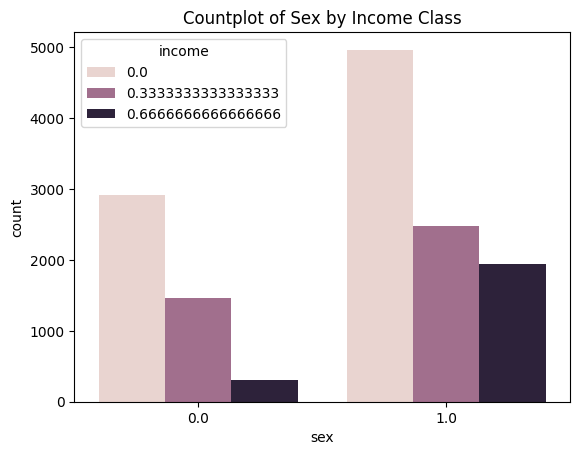

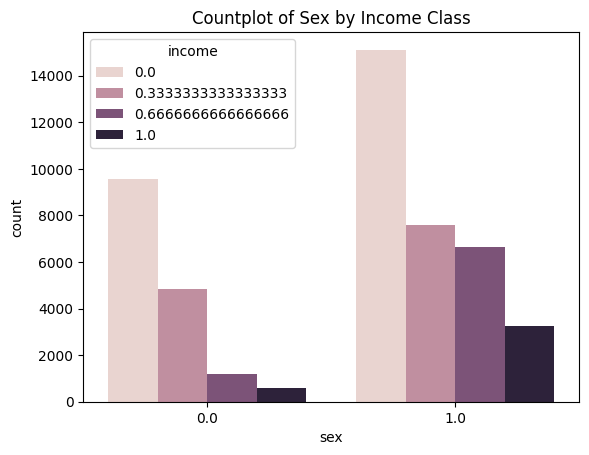

In [105]:
sns.countplot(x='sex', hue='income', data=df)
plt.title('Countplot of Sex by Income Class')
plt.show()


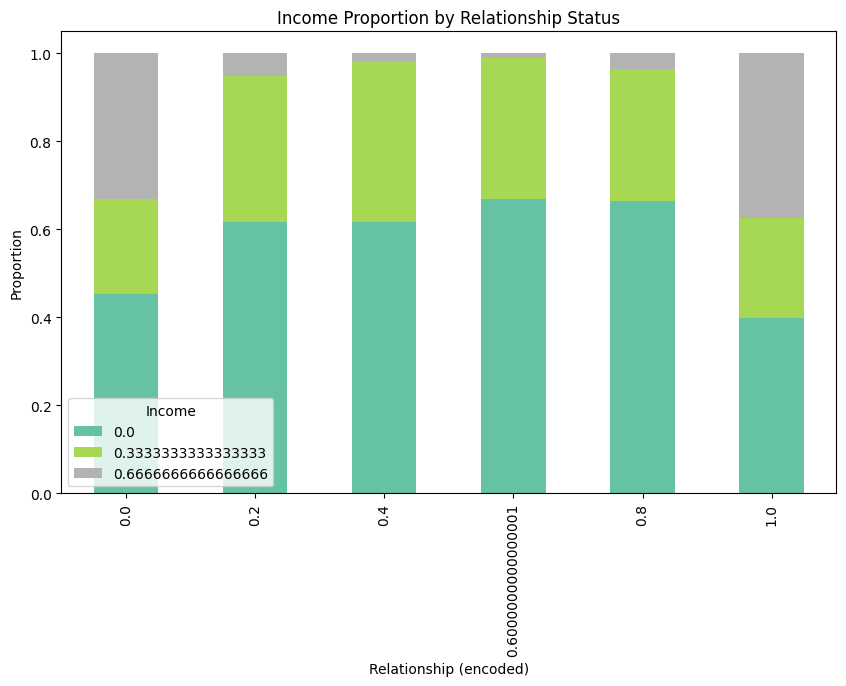

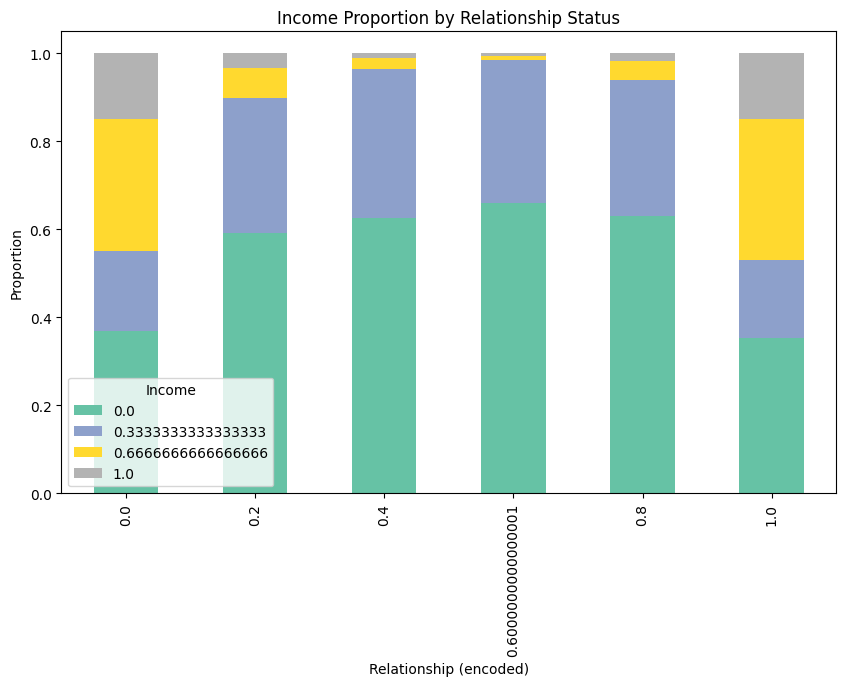

In [106]:
ct = pd.crosstab(df['relationship'], df['income'], normalize='index')
ct.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set2')
plt.title('Income Proportion by Relationship Status')
plt.xlabel('Relationship (encoded)')
plt.ylabel('Proportion')
plt.legend(title='Income')
plt.show()



In [107]:
# STEP 1: Mount Google Drive (if needed)
from google.colab import drive
drive.mount('/content/drive')

# STEP 2: Install required tools: LaTeX + Pandoc
!apt-get install -y texlive-xetex texlive-fonts-recommended texlive-plain-generic > /dev/null
!apt-get install -y pandoc > /dev/null  # ← This is the missing piece

# STEP 3: Set your notebook path
file_path = "/content/drive/MyDrive/Colab Notebooks/Machine_Learning/Assignment_1/Assignment_1_ML.ipynb"

# STEP 4: Convert the notebook to PDF and output to /content
!jupyter nbconvert --to pdf "{file_path}" --output-dir="/content"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Machine_Learning/Assignment_1/Assignment_1_ML.ipynb to pdf
[NbConvertApp] Support files will be in Assignment_1_ML_files/
[NbConvertApp] Making directory ./Assignment_1_ML_files
[NbConvertApp] Writing 93204 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 2889795 bytes to /content/Assignment_1_ML.pdf


In [108]:
from google.colab import files
import os

# Get the output file name
file_name = os.path.basename(file_path)
pdf_name = file_name.replace(".ipynb", ".pdf")

# Download from /content
files.download(f"/content/{pdf_name}")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>